# Homework 1

For this homework, we are going to work with [Seoul Bike Sharing Demand dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from UCI. Our aim in this homework is to predict Rented Bike count. The homework is due Sunday, October 29th midnight.

# Task 1

Download the dataset. 

Read the dataset using pandas.read_csv function.

Make data cleaning and preliminary analysis on dataframe (check the column/row counts, check if the data has missing values, fill the missing values with a method you choose, check the data type of columns, generate descriptive statistics for columns, generate graphs for some columns-you could use pyplot/seaborn etc, check if the data has any outlier values in any column and handle these values if it has).

You can generate your own inputs using the given features if you want (bonus point). 

You can also apply feature selection if you want (bonus point) - hint: correlation between input columns.

Encode categorical features.

Split your data into train and test sets.

# Task 2

Apply a linear regression model. 
First, try to construct your model without scaling your data. 
Then, construct another model with scaled inputs. 
Calculate performance evaluation metrics (RMSE, MSE, R-squared) for each model.

# Task 3

Apply another algorithm (tree-based algorithm) to your dataset. Calculate performance evaluation (RMSE, MSE, R-squared) for this model.

# Task 4

Explain the calculated evaluation metrics and compare your results for each model you trained in previous tasks.

Make some suggestions to improve model performance (they could be changings in data preparation step, using another regression algorithm etc.), explain them.

# Notes

1. You must document each step of your tasks: what are you doing, why are you doing it, what problems you encountered and how you solved it. All of these must be explained and documented. Solutions without sufficient documentations will be penalized accordingly. 50% of your points will come from your code, while the other 50% will come from your explanations.

2. You can use MS Excel to inspect the files, but loading them up to python using pandas and inspecting them there under jupyter is easier.

3. For both of Task 2 and Task 3, you must split your data into a train and test set, and then evaluate the performance of your model on the test set.

For further questions, please contact busesonugelen@gmail.com and sinanmustu.sm@gmail.com

## Solutions

#### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


#### Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#


In [115]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [116]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 100)
pd.set_option("expand_frame_repr", True)

In [117]:
data = pd.read_csv('SeoulBikeData.csv', encoding ='latin1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


- I want to see the values of columns for are there any absurd data input like Temperature being like 100 so i use describe function

In [118]:
# Extract the year, month, and day components into separate columns
data['year'] = pd.to_datetime(data['Date']).dt.year
data['month'] = pd.to_datetime(data['Date']).dt.month
data['day'] = pd.to_datetime(data['Date']).dt.day

# Your DataFrame now contains 'year', 'month', and 'day' columns


/var/folders/0_/ylxckpnd5k959xnjlp9zsd5w0000gn/T/ipykernel_82694/4047423641.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['year'] = pd.to_datetime(data['Date']).dt.year
/var/folders/0_/ylxckpnd5k959xnjlp9zsd5w0000gn/T/ipykernel_82694/4047423641.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['month'] = pd.to_datetime(data['Date']).dt.month
/var/folders/0_/ylxckpnd5k959xnjlp9zsd5w0000gn/T/ipykernel_82694/4047423641.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['day'] = pd.to_datetime(data['Date']).dt.day


In [119]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [121]:
data.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
year                         0
month                        0
day                          0
dtype: int64

In [122]:
hourly_data = data.groupby('Hour')['Rented Bike Count'].sum().reset_index()


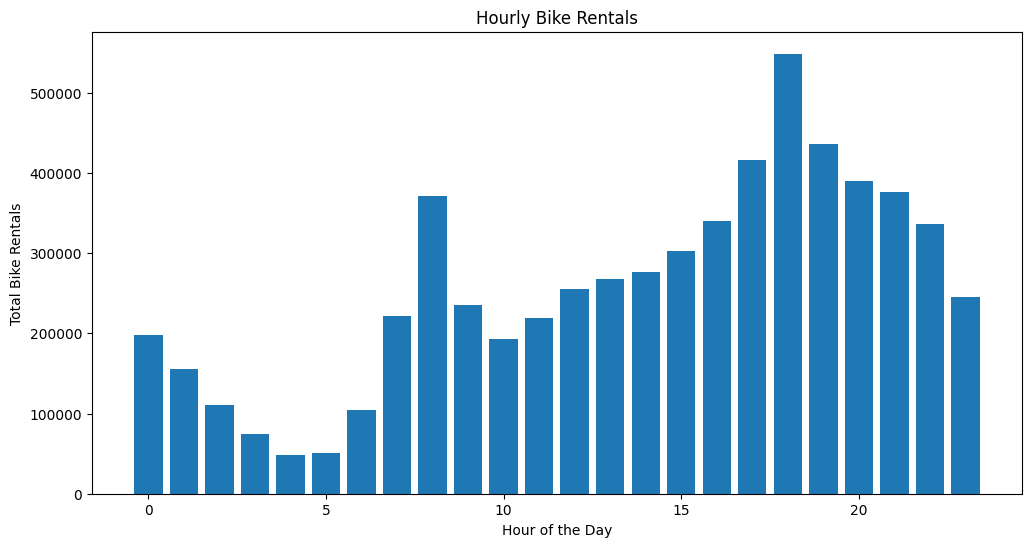

In [123]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_data['Hour'], hourly_data['Rented Bike Count'])

plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Hourly Bike Rentals')

plt.show()


### Daily datas
Hourly data is too complicated and exhausting so we put all hours together and did logical operations to corresponding data on other columns

In [124]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)



In [125]:
daily_data = data.groupby('Date').agg({
    'Rented Bike Count': 'sum',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'sum',
    'Rainfall(mm)': 'sum',
    'Snowfall (cm)': 'sum',
    'Seasons': 'first',
    'Holiday': 'first',
    'Functioning Day': 'first'
}).reset_index()
daily_data

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,9539,-2.454167,45.875000,1.537500,1870.750000,-13.545833,5.97,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-02,8523,1.325000,61.958333,1.712500,1471.083333,-5.716667,6.33,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-03,7222,4.875000,81.541667,1.612500,455.750000,1.883333,3.01,4.0,0.0,Winter,No Holiday,Yes
3,2017-12-04,8729,-0.304167,52.500000,3.450000,1362.833333,-9.925000,6.79,0.1,0.0,Winter,No Holiday,Yes
4,2017-12-05,8307,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.86,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-26,17162,6.320833,70.500000,1.029167,475.000000,0.845833,10.05,0.0,2.9,Autumn,No Holiday,Yes
361,2018-11-27,16282,7.066667,68.000000,1.350000,405.291667,1.000000,4.62,0.0,0.0,Autumn,No Holiday,Yes
362,2018-11-28,16524,5.304167,25.791667,1.695833,1429.083333,-13.350000,9.68,0.0,0.0,Autumn,No Holiday,Yes
363,2018-11-29,16423,3.304167,38.000000,1.212500,1596.708333,-9.808333,2.81,0.0,0.0,Autumn,No Holiday,Yes


In [126]:
daily_data.drop(columns='Seasons', inplace=True)

In [127]:

daily_data['year'] = pd.to_datetime(daily_data['Date']).dt.year
daily_data['month'] = pd.to_datetime(daily_data['Date']).dt.month
daily_data['day'] = pd.to_datetime(daily_data['Date']).dt.day
daily_data.drop(columns='Date',axis=1, inplace=True)

In [128]:
columns = daily_data.columns
new_columns = list(columns[-3:]) + list(columns[:-3])
daily_data = daily_data[new_columns]

### Correlation examine
We want to check multicollinearity first to make better assumptions

In [129]:
property_X = daily_data.drop(columns=["Rented Bike Count"], axis=1)
property_y = daily_data['Rented Bike Count']

In [130]:
property_X_train, property_X_test, property_y_train, property_y_test = train_test_split(property_X, 
                                                                                        property_y, test_size=0.1, 
                                                                                        random_state=1773)

In [131]:
# Convert "Holiday" and "Functioning Day" columns to binary encoding (0 and 1)
property_X_train['Holiday'] = property_X_train['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
property_X_train['Functioning Day'] = property_X_train['Functioning Day'].map({'No': 0, 'Yes': 1})
property_X_test['Holiday'] = property_X_test['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
property_X_test['Functioning Day'] = property_X_test['Functioning Day'].map({'No': 0, 'Yes': 1})


In [132]:
property_X_train.corr()

,year,month,day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
year,1.000000,-0.470590,-0.022360,0.381268,0.041479,0.010692,0.075544,0.333785,0.345963,0.059401,-0.327245,-0.135028,-0.059607
month,-0.470590,1.000000,0.029618,0.238053,0.184330,-0.282123,0.086634,0.258112,-0.077433,0.021288,0.057200,0.037163,-0.152175
day,-0.022360,0.029618,1.000000,0.026467,-0.023695,-0.064521,-0.134956,0.013688,-0.024520,0.009724,0.111085,-0.012869,0.085148
Temperature(°C),0.381268,0.238053,0.026467,1.000000,0.376626,-0.250314,0.043028,0.959331,0.528594,0.136839,-0.279527,-0.078553,-0.053881
Humidity(%),0.041479,0.184330,-0.023695,0.376626,1.000000,-0.195869,-0.556324,0.618375,-0.301054,0.531261,0.063180,-0.079988,-0.039562
Wind speed (m/s),0.010692,-0.282123,-0.064521,-0.250314,-0.195869,1.000000,0.178613,-0.270961,0.121353,-0.070227,0.013701,0.052346,-0.001781
Visibility (10m),0.075544,0.086634,-0.134956,0.043028,-0.556324,0.178613,1.000000,-0.124006,0.296566,-0.223669,-0.108389,0.033683,-0.042300
Dew point temperature(°C),0.333785,0.258112,0.013688,0.959331,0.618375,-0.270961,-0.124006,1.000000,0.354941,0.262748,-0.218941,-0.089070,-0.059089
Solar Radiation (MJ/m2),0.345963,-0.077433,-0.024520,0.528594,-0.301054,0.121353,0.296566,0.354941,1.000000,-0.327906,-0.226475,-0.017368,-0.015723
Rainfall(mm),0.059401,0.021288,0.009724,0.136839,0.531261,-0.070227,-0.223669,0.262748,-0.327906,1.000000,-0.044743,-0.034729,-0.033247


In [133]:
corr_matrix = property_X_train.corr()
corr_matrix


,year,month,day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
year,1.000000,-0.470590,-0.022360,0.381268,0.041479,0.010692,0.075544,0.333785,0.345963,0.059401,-0.327245,-0.135028,-0.059607
month,-0.470590,1.000000,0.029618,0.238053,0.184330,-0.282123,0.086634,0.258112,-0.077433,0.021288,0.057200,0.037163,-0.152175
day,-0.022360,0.029618,1.000000,0.026467,-0.023695,-0.064521,-0.134956,0.013688,-0.024520,0.009724,0.111085,-0.012869,0.085148
Temperature(°C),0.381268,0.238053,0.026467,1.000000,0.376626,-0.250314,0.043028,0.959331,0.528594,0.136839,-0.279527,-0.078553,-0.053881
Humidity(%),0.041479,0.184330,-0.023695,0.376626,1.000000,-0.195869,-0.556324,0.618375,-0.301054,0.531261,0.063180,-0.079988,-0.039562
Wind speed (m/s),0.010692,-0.282123,-0.064521,-0.250314,-0.195869,1.000000,0.178613,-0.270961,0.121353,-0.070227,0.013701,0.052346,-0.001781
Visibility (10m),0.075544,0.086634,-0.134956,0.043028,-0.556324,0.178613,1.000000,-0.124006,0.296566,-0.223669,-0.108389,0.033683,-0.042300
Dew point temperature(°C),0.333785,0.258112,0.013688,0.959331,0.618375,-0.270961,-0.124006,1.000000,0.354941,0.262748,-0.218941,-0.089070,-0.059089
Solar Radiation (MJ/m2),0.345963,-0.077433,-0.024520,0.528594,-0.301054,0.121353,0.296566,0.354941,1.000000,-0.327906,-0.226475,-0.017368,-0.015723
Rainfall(mm),0.059401,0.021288,0.009724,0.136839,0.531261,-0.070227,-0.223669,0.262748,-0.327906,1.000000,-0.044743,-0.034729,-0.033247


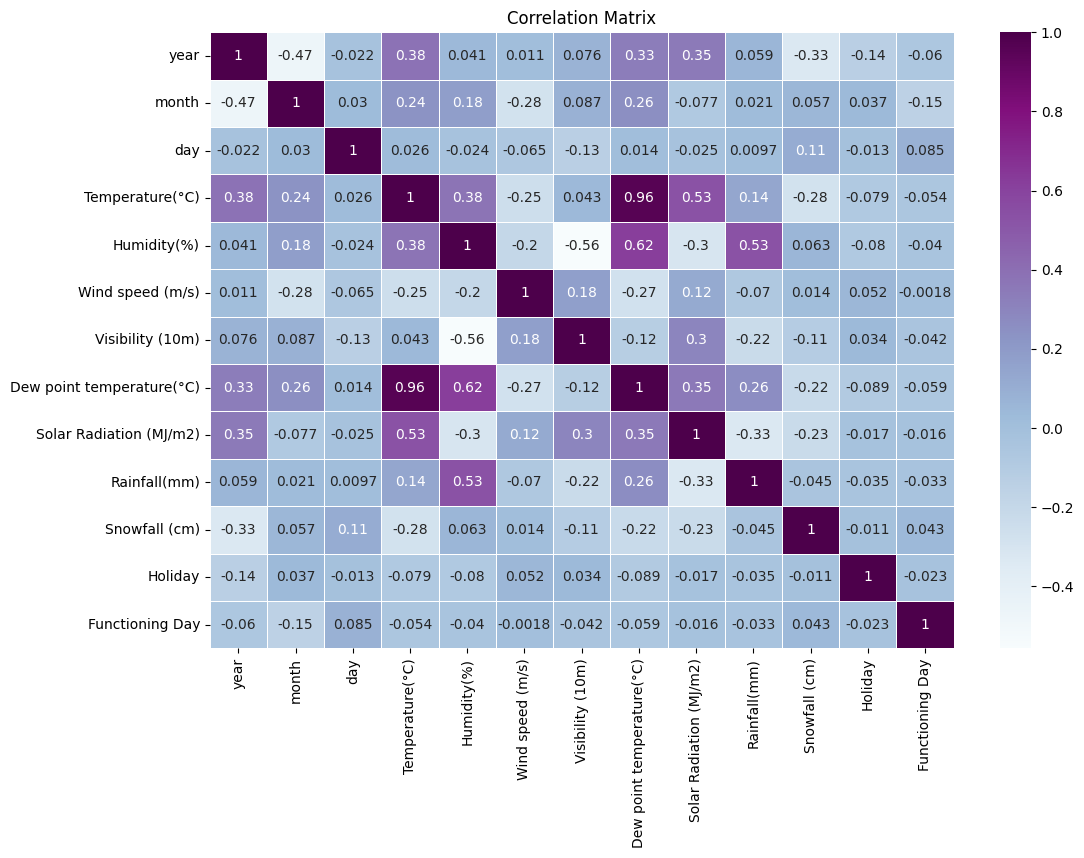

In [134]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [135]:
property_X_train["intercept"]=1 # add a column of 1's to the X df
property_X_train.head()

,year,month,day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,intercept
184,2018,6,3,23.712500,41.166667,1.691667,1834.833333,8.629167,27.18,0.0,0.0,0,1,1
326,2018,10,23,12.495833,71.625000,1.258333,855.833333,7.391667,7.68,5.0,0.0,0,1,1
282,2018,9,9,21.958333,49.458333,1.233333,1997.166667,10.262500,21.40,0.0,0.0,0,1,1
169,2018,5,19,17.266667,47.083333,1.537500,1996.250000,5.816667,29.13,0.0,0.0,0,1,1
295,2018,9,22,21.008333,63.416667,1.733333,1551.333333,12.620833,19.06,6.5,0.0,0,1,1


In [136]:
new_x_train = property_X_train

In [137]:
vif_df = pd.DataFrame()
vif_df["feature"] = new_x_train.columns  # attach a column named feature which involves feature names 
vif_df

,feature
0,year
1,month
2,day
3,Temperature(°C)
4,Humidity(%)
5,Wind speed (m/s)
6,Visibility (10m)
7,Dew point temperature(°C)
8,Solar Radiation (MJ/m2)
9,Rainfall(mm)


In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df["feature"] = new_x_train.columns
vif_df["VIF"] = [variance_inflation_factor(new_x_train.values, i) for i in range(new_x_train.shape[1])]

vif_df


,feature,VIF
0,year,2.165292e+00
1,month,2.127107e+00
2,day,1.096023e+00
3,Temperature(°C),3.177825e+02
4,Humidity(%),4.711978e+01
5,Wind speed (m/s),1.326142e+00
6,Visibility (10m),2.054913e+00
7,Dew point temperature(°C),4.349207e+02
8,Solar Radiation (MJ/m2),2.962737e+00
9,Rainfall(mm),1.759825e+00


In [139]:
vif_df.sort_values("VIF", ascending=False, inplace=True) #ignore intercept row  in the below table    
vif_df

,feature,VIF
13,intercept,1.207878e+08
7,Dew point temperature(°C),4.349207e+02
3,Temperature(°C),3.177825e+02
4,Humidity(%),4.711978e+01
8,Solar Radiation (MJ/m2),2.962737e+00
0,year,2.165292e+00
1,month,2.127107e+00
6,Visibility (10m),2.054913e+00
9,Rainfall(mm),1.759825e+00
5,Wind speed (m/s),1.326142e+00


In [140]:
Xnew = new_x_train.drop(columns=['Dew point temperature(°C)'], axis=1)
#Xnew.head()

In [141]:
vifnew_df = pd.DataFrame() # create an empty data frame
vifnew_df["feature"] = Xnew.columns  # attach a column of involving feature names
vifnew_df["VIF"] = [variance_inflation_factor(Xnew.values, i) for i in range(len(Xnew.columns))]  #list comprehension 
vifnew_df.sort_values('VIF', ascending=False, inplace=True) #ignore intercept row  in the below table
vifnew_df



,feature,VIF
12,intercept,1.205434e+08
3,Temperature(°C),4.010193e+00
4,Humidity(%),3.701495e+00
7,Solar Radiation (MJ/m2),2.917764e+00
0,year,2.160191e+00
1,month,2.112133e+00
6,Visibility (10m),1.970507e+00
8,Rainfall(mm),1.558750e+00
5,Wind speed (m/s),1.325877e+00
9,Snowfall (cm),1.244063e+00


## Feature Selection

Remaining features `Solar Radiation (MJ/m2)`, `Temperature(°C)`, `Rainfall(mm)`,  `Visibility (10m)`,  `Wind speed (m/s)`, `Snowfall (cm)`, `Humiditiy(%)`, `Holiday` and `Functioning Day` have VIF lower than 5 is a commonly used threshold to detect and manage multicollinearity. We can eliminate some columns just by looking at correlation matrix but checking VIF gives us best resulst to make it more accurate in feature selection

In [142]:
property_X_train = property_X_train.drop(columns='intercept',axis=1)

fs_X_train = property_X_train.drop(columns='Dew point temperature(°C)',axis=1)
fs_X_test = property_X_test.drop(columns='Dew point temperature(°C)',axis=1)

In [143]:
print(fs_X_test.shape)
print(fs_X_train.shape)

(37, 12)
(328, 12)


## Task 2

In [144]:
property_X_train

,year,month,day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
184,2018,6,3,23.712500,41.166667,1.691667,1834.833333,8.629167,27.18,0.0,0.0,0,1
326,2018,10,23,12.495833,71.625000,1.258333,855.833333,7.391667,7.68,5.0,0.0,0,1
282,2018,9,9,21.958333,49.458333,1.233333,1997.166667,10.262500,21.40,0.0,0.0,0,1
169,2018,5,19,17.266667,47.083333,1.537500,1996.250000,5.816667,29.13,0.0,0.0,0,1
295,2018,9,22,21.008333,63.416667,1.733333,1551.333333,12.620833,19.06,6.5,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2018,11,29,3.304167,38.000000,1.212500,1596.708333,-9.808333,2.81,0.0,0.0,0,1
198,2018,6,17,22.733333,67.125000,1.425000,812.708333,16.020833,14.78,0.0,0.0,0,1
254,2018,8,12,30.691667,59.625000,1.504167,1846.708333,21.520833,18.23,5.0,0.0,0,1
164,2018,5,14,17.741667,72.416667,1.391667,364.208333,12.233333,19.19,0.0,0.0,0,1


In [145]:
from sklearn.linear_model import LinearRegression
# without feature selection 
lr = LinearRegression()
lr.fit(property_X_train, property_y_train)
property_y_train_pred = lr.predict(property_X_train)
property_y_test_pred = lr.predict(property_X_test)

In [146]:
# with feature selection
lr_fs = LinearRegression()
lr_fs.fit(fs_X_train, property_y_train)
property_y_train_pred_fs = lr_fs.predict(fs_X_train)
property_y_test_pred_fs = lr_fs.predict(fs_X_test)

In [147]:

from sklearn.metrics import mean_squared_error, r2_score

print('Train (without feature selection) R2: %.4f'
      % r2_score(property_y_train, property_y_train_pred))
print('Test (without feature selection) R2: %.4f'
      % r2_score(property_y_test, property_y_test_pred))

Train (without feature selection) R2: 0.8100
Test (without feature selection) R2: 0.8655


In [148]:
from sklearn.metrics import mean_squared_error, r2_score

print('Train (with feature selection) R2: %.4f'
      % r2_score(property_y_train, property_y_train_pred_fs))
print('Test (with feature selection) R2: %.4f'
      % r2_score(property_y_test, property_y_test_pred_fs))

Train (with feature selection) R2: 0.8079
Test (with feature selection) R2: 0.8605


In [149]:
print('Train (without feature selection) MSE: %.4f'
    % mean_squared_error(property_y_train, property_y_train_pred))
print('Test (without feature selection) MSE: %.4f'
    % mean_squared_error(property_y_test, property_y_test_pred))



Train (without feature selection) MSE: 19838186.4991
Test (without feature selection) MSE: 14666978.6776


In [150]:
print('Train (with feature selection) MSE: %.4f'
    % mean_squared_error(property_y_train, property_y_train_pred_fs))
print('Test (with feature selection) MSE: %.4f'
    % mean_squared_error(property_y_test, property_y_test_pred_fs))

Train (with feature selection) MSE: 20062490.3703
Test (with feature selection) MSE: 15213261.3446


In [151]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler instance
scaler = MinMaxScaler()

In [153]:
train_x_scaled = scaler.fit_transform(property_X_train)
test_x_scaled = scaler.transform(property_X_test) 

In [158]:
model_scaled = LinearRegression()
model_scaled.fit(train_x_scaled, property_y_train)
y_pred_scaled = model_scaled.predict(test_x_scaled)
mse_scaled = mean_squared_error(property_y_test, y_pred_scaled)
mse_scaled

14666978.67757836

In [159]:
scaled_fs_x_train = scaler.fit_transform(fs_X_train)
scaled_fs_x_test = scaler.transform(fs_X_test) 

In [160]:
model_scaled = LinearRegression()
model_scaled.fit(scaled_fs_x_train, property_y_train)
y_fs_pred_scaled = model_scaled.predict(scaled_fs_x_test)
mse_scaled = mean_squared_error(property_y_test, y_fs_pred_scaled)
mse_scaled

15213261.344552075

## Task 3

## Task 4